In [8]:
import pandas as pd
import os
from plotnine import *

pd.set_option('display.max_columns', None)

path = '../collisions_1979_2022.csv'
df_collisions = pd.read_csv(path, usecols = ['accident_index', 'accident_year', 'date','day_of_week','time'], low_memory = False)

In [9]:
### Select years 2000 - 2022, check shape
df_collisions = df_collisions[df_collisions['accident_year'] >= 2000]
print(df_collisions.shape)
print(len(df_collisions.accident_index.unique()))

(3691651, 5)
3691651


In [10]:
# Map month names
df_collisions['date'] = pd.to_datetime(df_collisions['date'], dayfirst=True)
df_collisions['month'] = df_collisions['date'].dt.month

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df_collisions['month_name'] = df_collisions['month'].map(month_names)

In [11]:
# Map day names
days_names = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday',
}

df_collisions['day_name'] = df_collisions['day_of_week'].map(days_names)

In [15]:
### Extract hour from accident time
df_collisions['time'] = pd.to_datetime(df_collisions['time'], format='%Y-%m-%d %H:%M:%S')
df_collisions['hour'] = df_collisions['time'].dt.hour
df_collisions['hour'] = df_collisions['hour'].astype(str).str.zfill(2) + ':00'

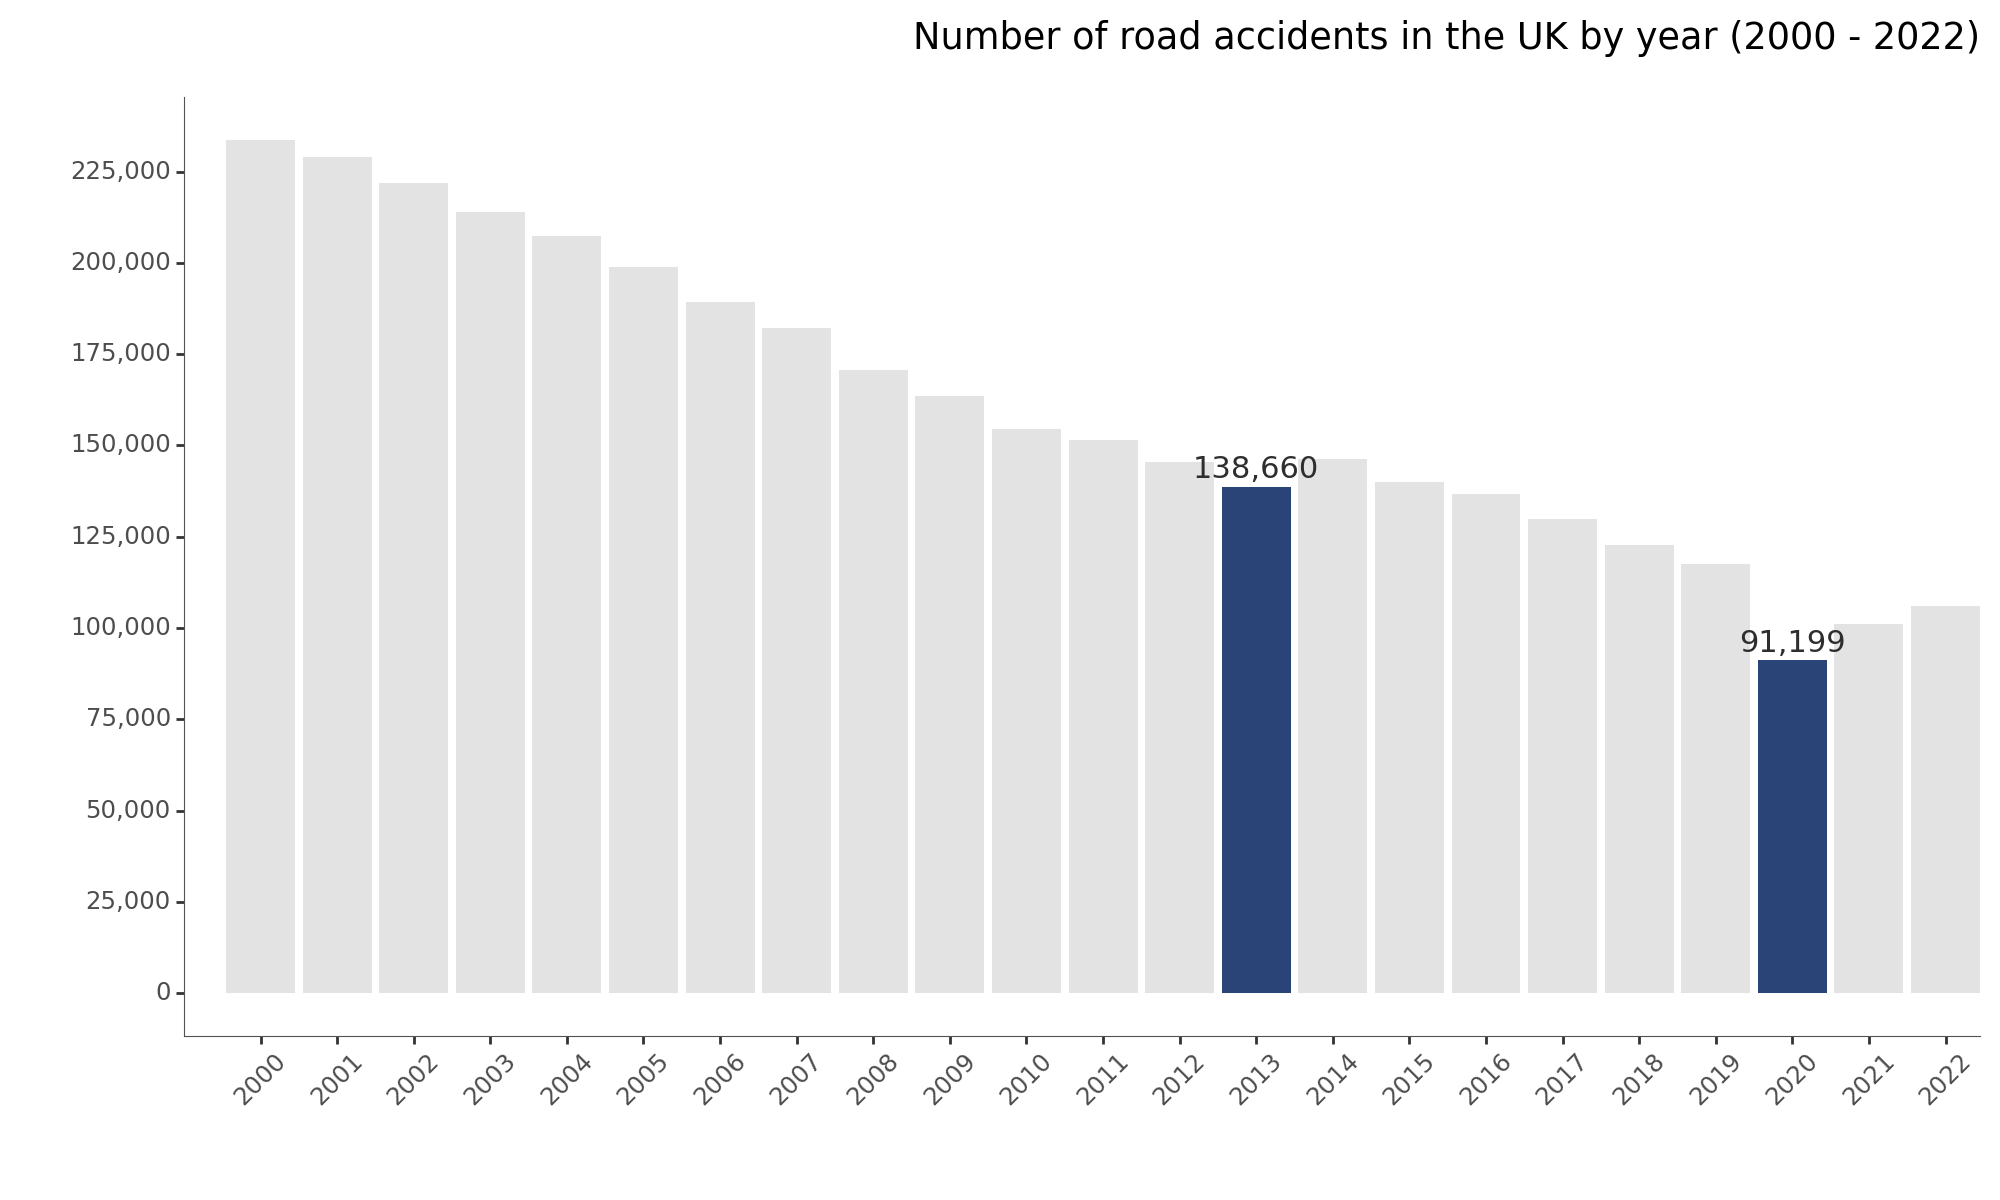

In [21]:
### Total accidents by year
total_acc_by_year = df_collisions.groupby('accident_year').size()
df_total_acc_by_year = pd.DataFrame({'accident_year': total_acc_by_year.index, 'total_accidents': total_acc_by_year.values})

plot_total_acc_by_year = (
    ggplot(df_total_acc_by_year, aes(x='accident_year', y='total_accidents')) +
    geom_bar(stat='identity', fill='#e3e3e3') +
    geom_bar(df_total_acc_by_year[df_total_acc_by_year['accident_year'] == 2020], aes(x='accident_year', y='total_accidents'), fill='#2a4478', stat='identity') +
    geom_text(df_total_acc_by_year[df_total_acc_by_year['accident_year'] == 2020], aes(x='accident_year', y='total_accidents', label='total_accidents'), color='#2e2e2e', va='bottom', size=11, nudge_y=700, format_string="{:,}") +
    geom_bar(df_total_acc_by_year[df_total_acc_by_year['accident_year'] == 2013], aes(x='accident_year', y='total_accidents'), fill='#2a4478', stat='identity') + 
    geom_text(df_total_acc_by_year[df_total_acc_by_year['accident_year'] == 2013], aes(x='accident_year', y='total_accidents', label='total_accidents'), color='#2e2e2e', va='bottom', size=11, nudge_y=700, format_string="{:,}") +
    labs(title='Number of road accidents in the UK by year (2000 - 2022)') +
    theme_classic() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),  
        plot_title=element_text(hjust=1), 
        axis_title_x=element_text(color="white"), 
        axis_title_y=element_text(color="white"),
        figure_size=(10, 6) 
    ) +
    scale_x_continuous(breaks=range(2000, int(df_total_acc_by_year['accident_year'].max()) + 1, 1),
                       labels=range(2000, int(df_total_acc_by_year['accident_year'].max()) + 1, 1),
                       limits=(1999, None),
                       expand=(0, 0)) +
    scale_y_continuous(breaks=range(0, int(df_total_acc_by_year['total_accidents'].max()) + 1, 25000),
                       labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot_total_acc_by_year)


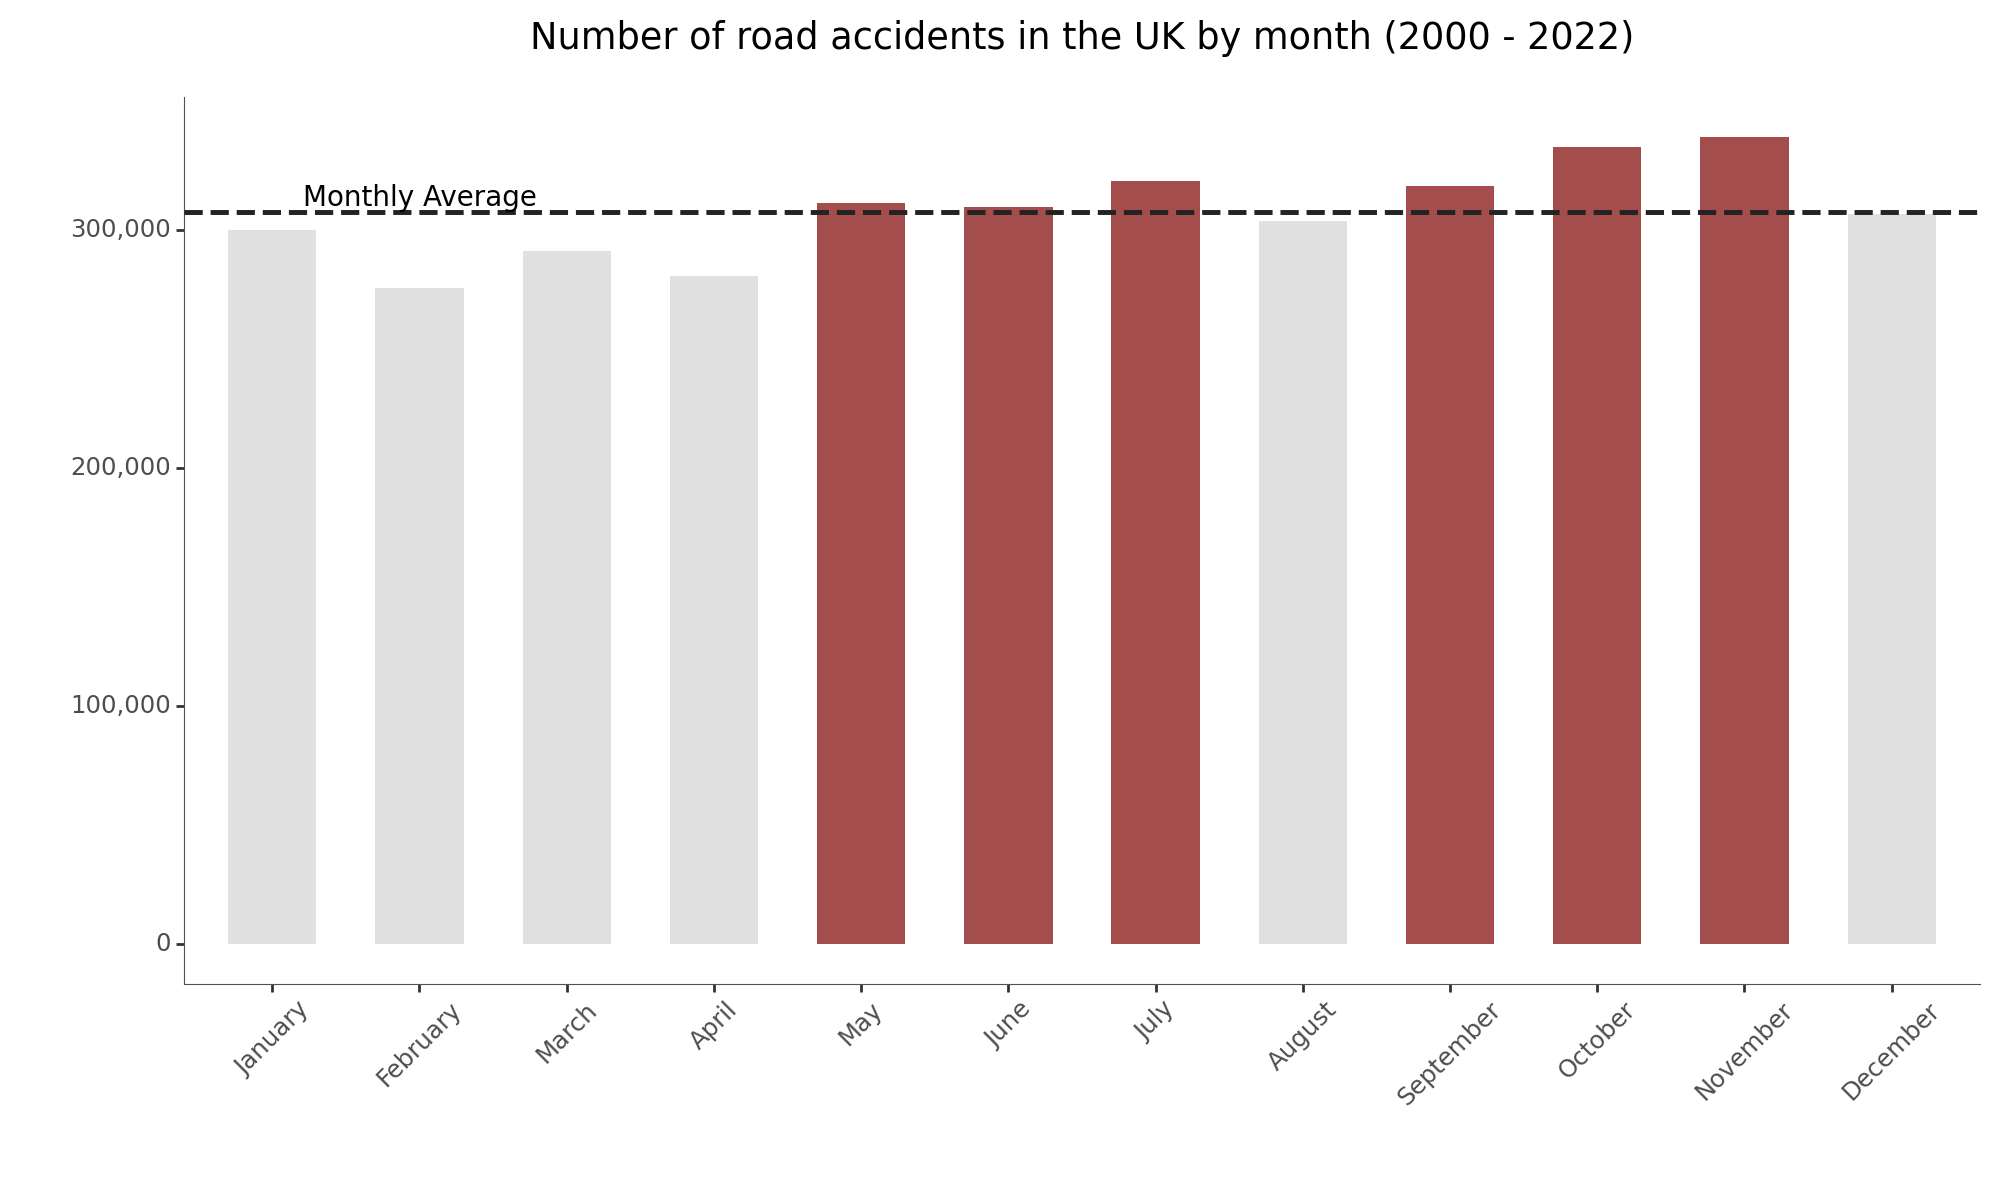

In [22]:
### Total accidents by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

total_acc_by_month = df_collisions.groupby('month_name').size()
df_accidents_by_month = pd.DataFrame({'accident_month': total_acc_by_month.index, 'total_accidents': total_acc_by_month.values}).reset_index(drop=True)

### Calculate above/below average values
average_accidents = df_accidents_by_month['total_accidents'].mean()
df_accidents_by_month['above_average'] = df_accidents_by_month['total_accidents'] > average_accidents

plot_total_acc_by_month = (
    ggplot(df_accidents_by_month, aes(x='accident_month', y='total_accidents')) +
    geom_bar(stat='identity', fill='#e0e0e0', width=0.6) +
    geom_bar(df_accidents_by_month[df_accidents_by_month['above_average'] == True], aes(x='accident_month', y='total_accidents'), fill='#a34d4d', stat='identity', width=0.6) +
    geom_hline(yintercept=df_accidents_by_month['total_accidents'].mean(), linetype='dashed', color='#242323', size=1) +
    annotate("text", x='February', y=df_accidents_by_month['total_accidents'].mean(), label='Monthly Average', color='black', size=10, va='bottom') +  
    labs(title='Number of road accidents in the UK by month (2000 - 2022)') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),
        plot_title=element_text(hjust=0.5), 
        axis_title_x=element_text(color="white"),  
        axis_title_y=element_text(color="white"),
        legend_position='bottom',  
        legend_box='horizontal',  
        figure_size=(10, 6)  
    ) +
    scale_x_discrete(breaks=month_order, limits=month_order) +
    scale_y_continuous(breaks=range(0, int(df_accidents_by_month[['total_accidents']].max().max()) + 1, 100000),
                       labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot_total_acc_by_month)


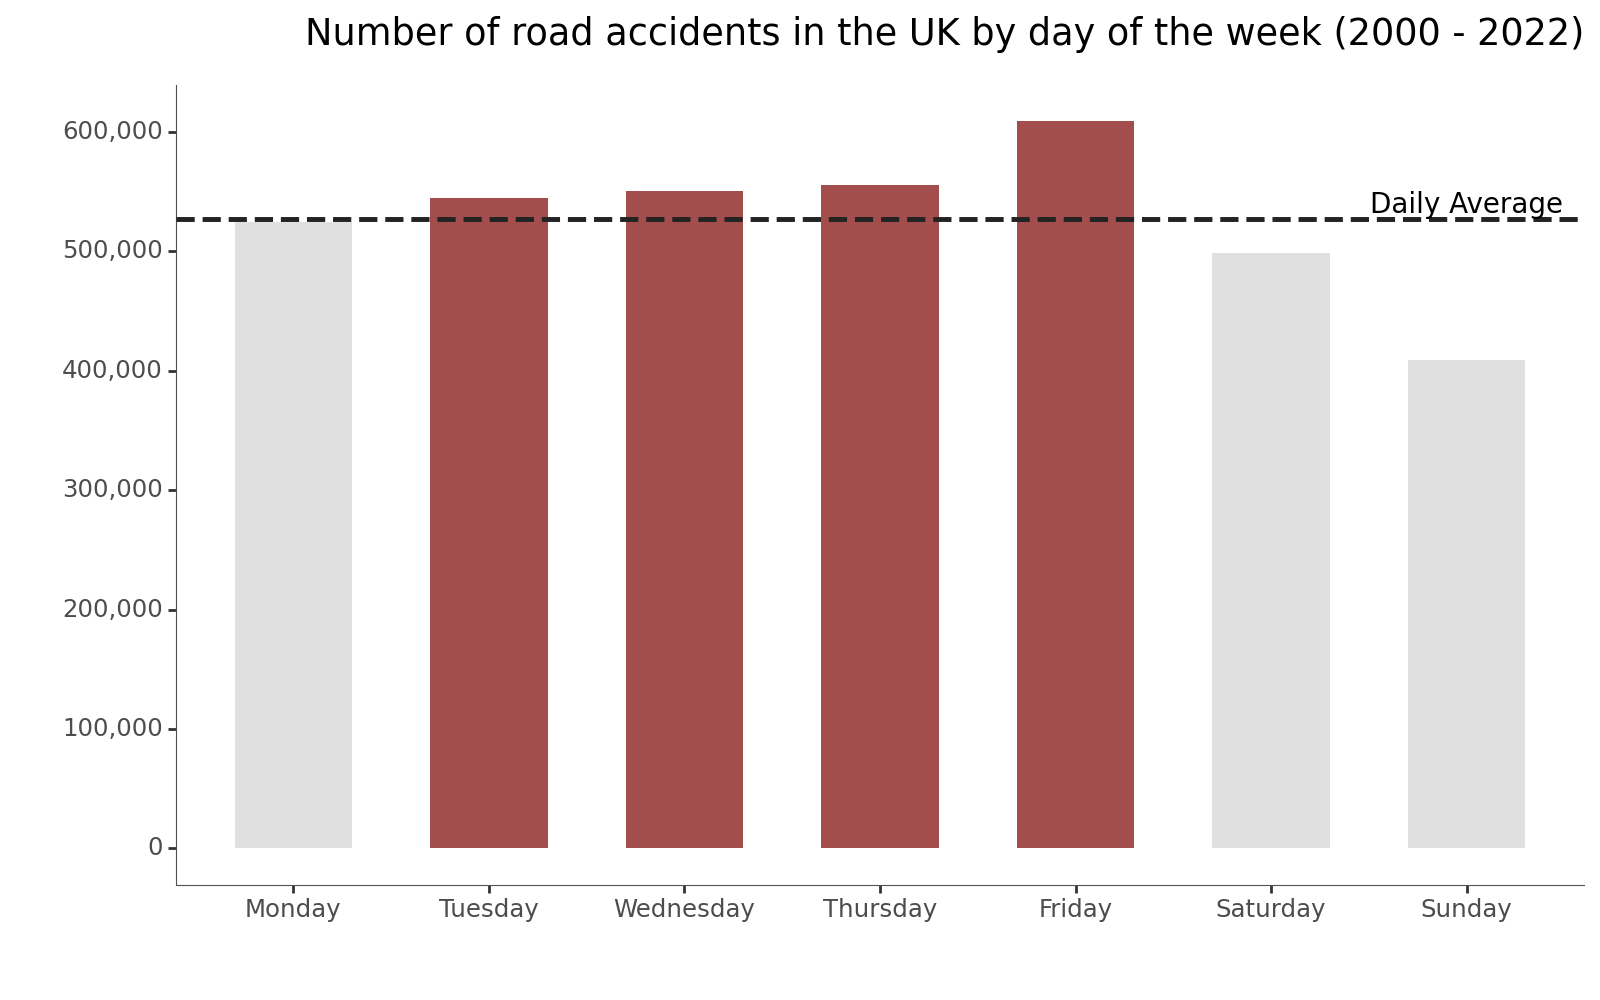

In [23]:
### Total accidents by day of the week
total_acc_by_day = df_collisions.groupby('day_name')['accident_index'].size()
df_total_acc_by_day = pd.DataFrame({'day_name': total_acc_by_day.index, 'total_accidents': total_acc_by_day.values}).reset_index(drop=True)

# Set the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

###
average_accidents = df_total_acc_by_day['total_accidents'].mean()
df_total_acc_by_day['above_average'] = df_total_acc_by_day['total_accidents'] > average_accidents


plot_total_acc_by_day = (
    ggplot(df_total_acc_by_day, aes(x='day_name', y='total_accidents')) +
    geom_bar(df_total_acc_by_day[df_total_acc_by_day['above_average'] == False], stat='identity', fill='#e0e0e0', width=0.6) +
    geom_bar(df_total_acc_by_day[df_total_acc_by_day['above_average'] == True], aes(x='day_name', y='total_accidents'), fill='#a34d4d', stat='identity', width=0.6) +
    geom_hline(yintercept=df_total_acc_by_day['total_accidents'].mean(), linetype='dashed', color='#242323', size=1) +
    annotate("text", x='Sunday', y=df_total_acc_by_day['total_accidents'].mean(), label='Daily Average', color='black', size=10, va='bottom') +
    labs(
        title='Number of road accidents in the UK by day of the week (2000 - 2022)'
    ) +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=1),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        legend_position='bottom',
        legend_box='horizontal',
        figure_size=(8, 5),
        plot_subtitle=element_text(size=11, vjust=0.5)
    ) +
    scale_x_discrete(breaks=days_order, limits=days_order) +
    scale_y_continuous(breaks=range(0, int(df_total_acc_by_day[['total_accidents']].max().max()) + 1, 100000),
                       labels=lambda x: ["{:,}".format(label) for label in x]) 
)

print(plot_total_acc_by_day)

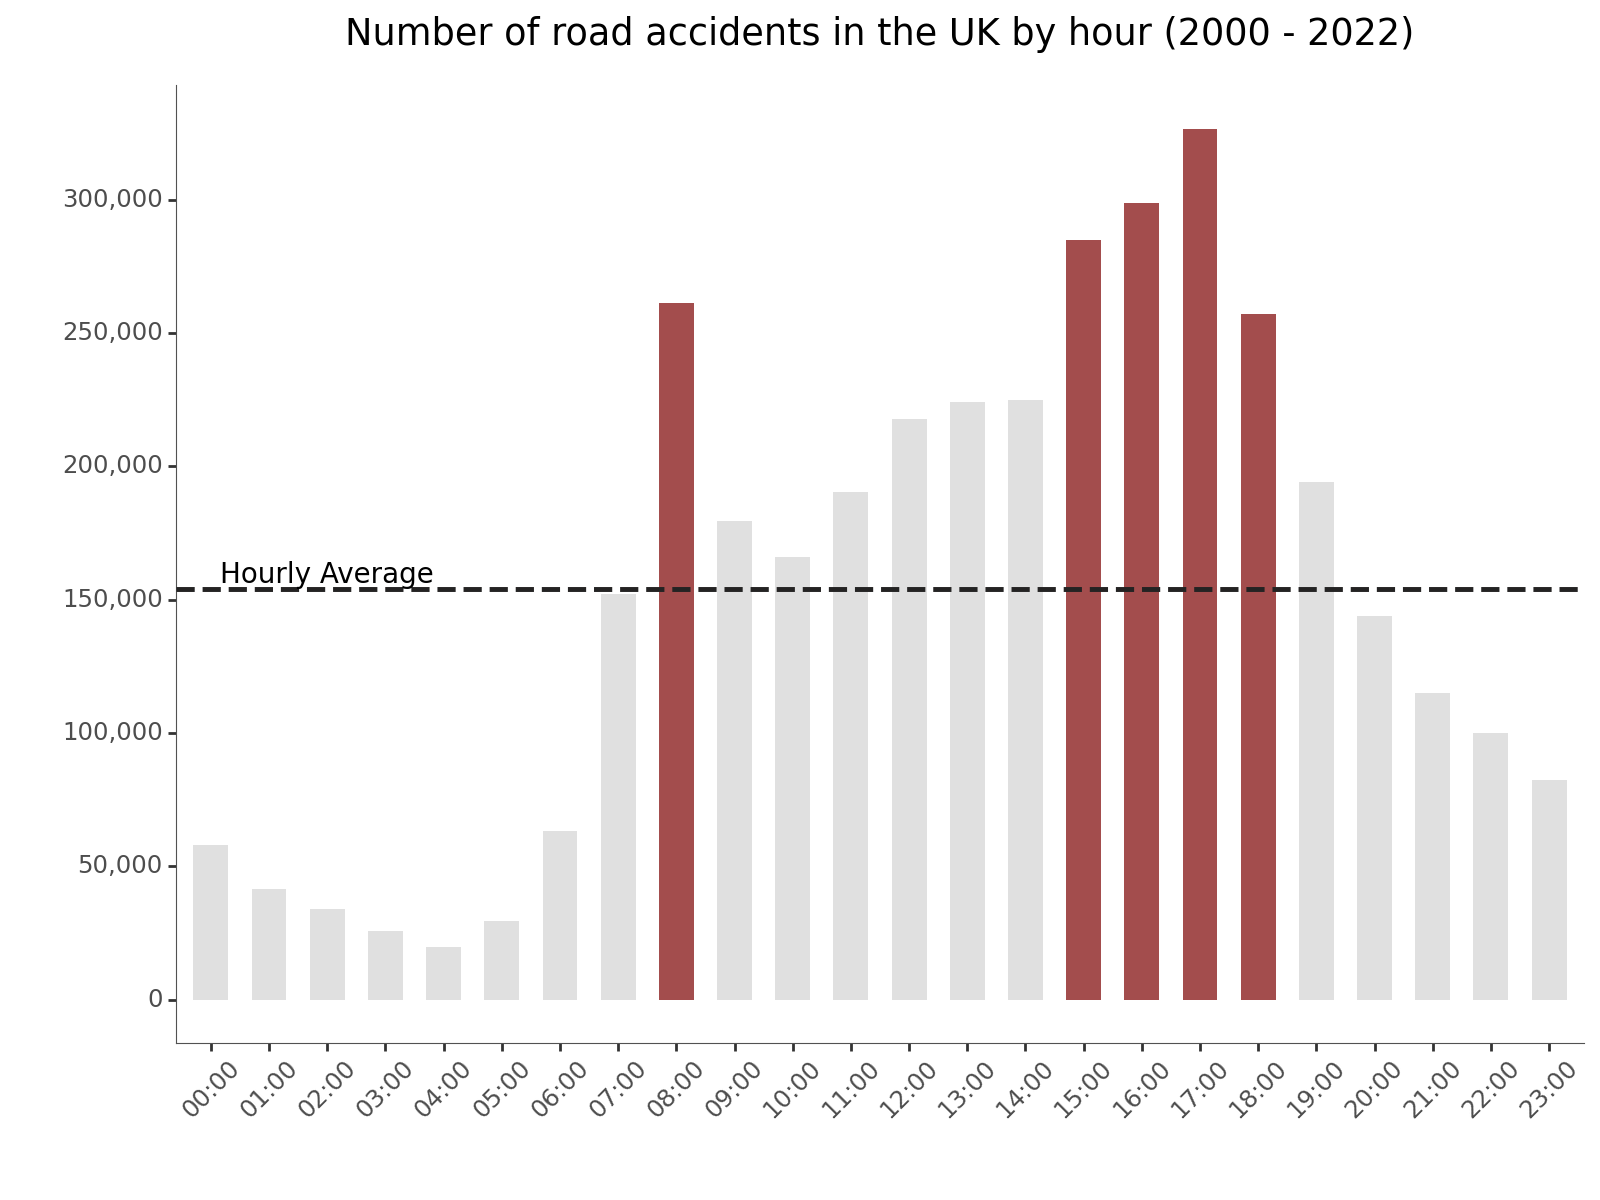

In [24]:
### Total accidents by hour of the day
total_acc_by_time = df_collisions.groupby('hour').size()
df_total_acc_by_time = pd.DataFrame({'total_accidents': total_acc_by_time}).reset_index()

### Getting top 5 hours with the most accidents
top_5 = df_total_acc_by_time['total_accidents'].nlargest(5)
df_total_acc_by_time['top_5'] = df_total_acc_by_time['total_accidents'].isin(top_5)

hours_order = df_total_acc_by_time['hour'].tolist()

plot_total_acc_by_time = (
    ggplot(df_total_acc_by_time, aes(x='hour', y='total_accidents')) +
    geom_bar(df_total_acc_by_time[df_total_acc_by_time['top_5'] == False], stat='identity', fill='#e0e0e0', width=0.6) +
    geom_bar(df_total_acc_by_time[df_total_acc_by_time['top_5'] == True], aes(x='hour', y='total_accidents'), fill='#a34d4d', stat='identity', width=0.6) +
    geom_hline(yintercept=df_total_acc_by_time['total_accidents'].mean(), linetype='dashed', color='#242323', size=1) +
    labs(title='Number of road accidents in the UK by hour (2000 - 2022)') +
    annotate("text", x='02:00', y=df_total_acc_by_time['total_accidents'].mean(), label='Hourly Average', color='black', size=10, va='bottom') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),
        plot_title=element_text(hjust=0.5),  
        axis_title_x=element_text(color="white"), 
        axis_title_y=element_text(color="white"),
        legend_position='bottom',  
        legend_box='horizontal',  
        figure_size=(8, 6)  
    ) +
    scale_x_discrete(breaks=hours_order, limits=hours_order) +
    scale_y_continuous(breaks=range(0, int(df_total_acc_by_day[['total_accidents']].max().max()) + 1, 50000),
                       labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot_total_acc_by_time)


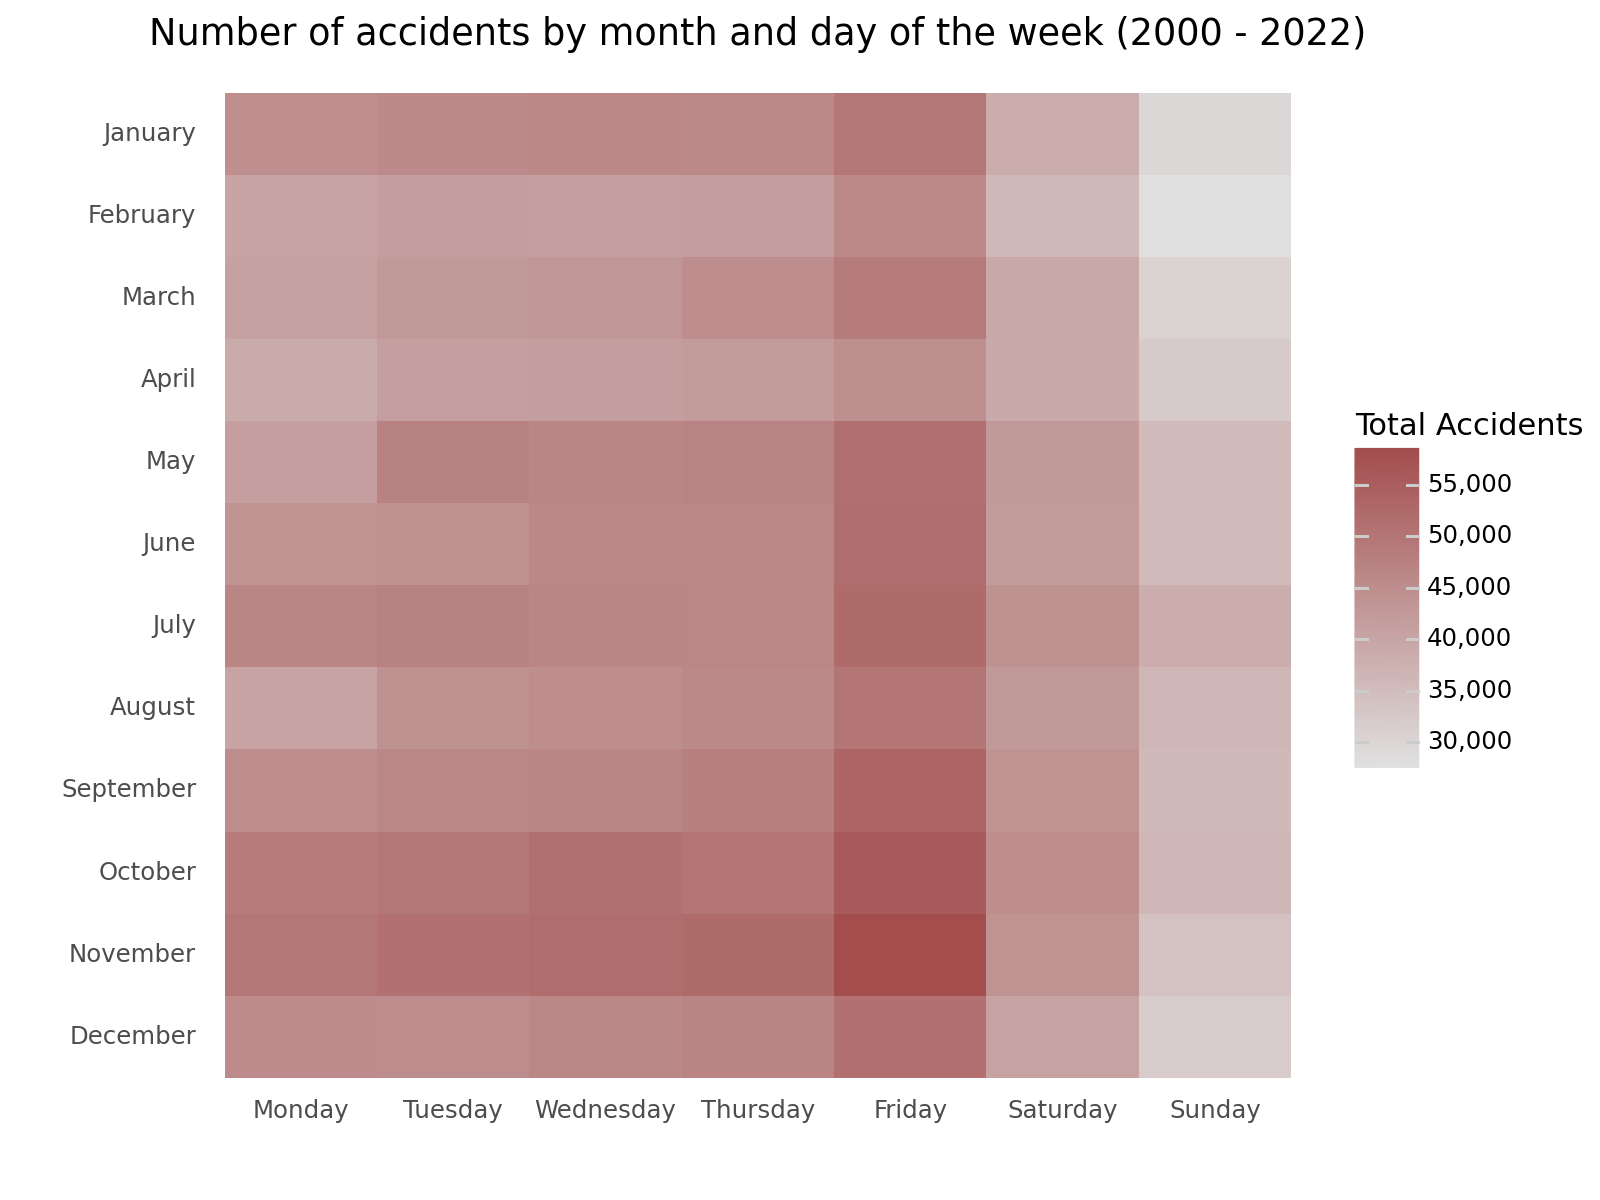

In [26]:
### Heatmap of total accidents by month and day of the week
heat_total_acc_by_day = df_collisions.groupby(['month_name', 'day_name'])['accident_index'].size().reset_index(name='total_accidents')

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

# Create the heatmap
heatmap_plot_1 = (
    ggplot(heat_total_acc_by_day, aes(x='day_name', y='month_name', fill='total_accidents')) +
    geom_tile() +
    scale_fill_gradient(
        low="#e0e0e0", high="#a34d4d",
        breaks=range(0, heat_total_acc_by_day['total_accidents'].max() + 1, 5000),
        labels=lambda x: ["{:,}".format(label) for label in x]
    ) +
    labs(title='Number of accidents by month and day of the week (2000 - 2022)',
         x='Day of the Week', y='Month', fill='Total Accidents') +
    theme_minimal() +
    theme(
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        legend_position='right',
        figure_size=(8, 6),
        panel_grid_major=element_blank(),  
        panel_grid_minor=element_blank()
    ) +
    scale_x_discrete(limits=days_order) +
    scale_y_discrete(limits=month_order)
)

print(heatmap_plot_1)


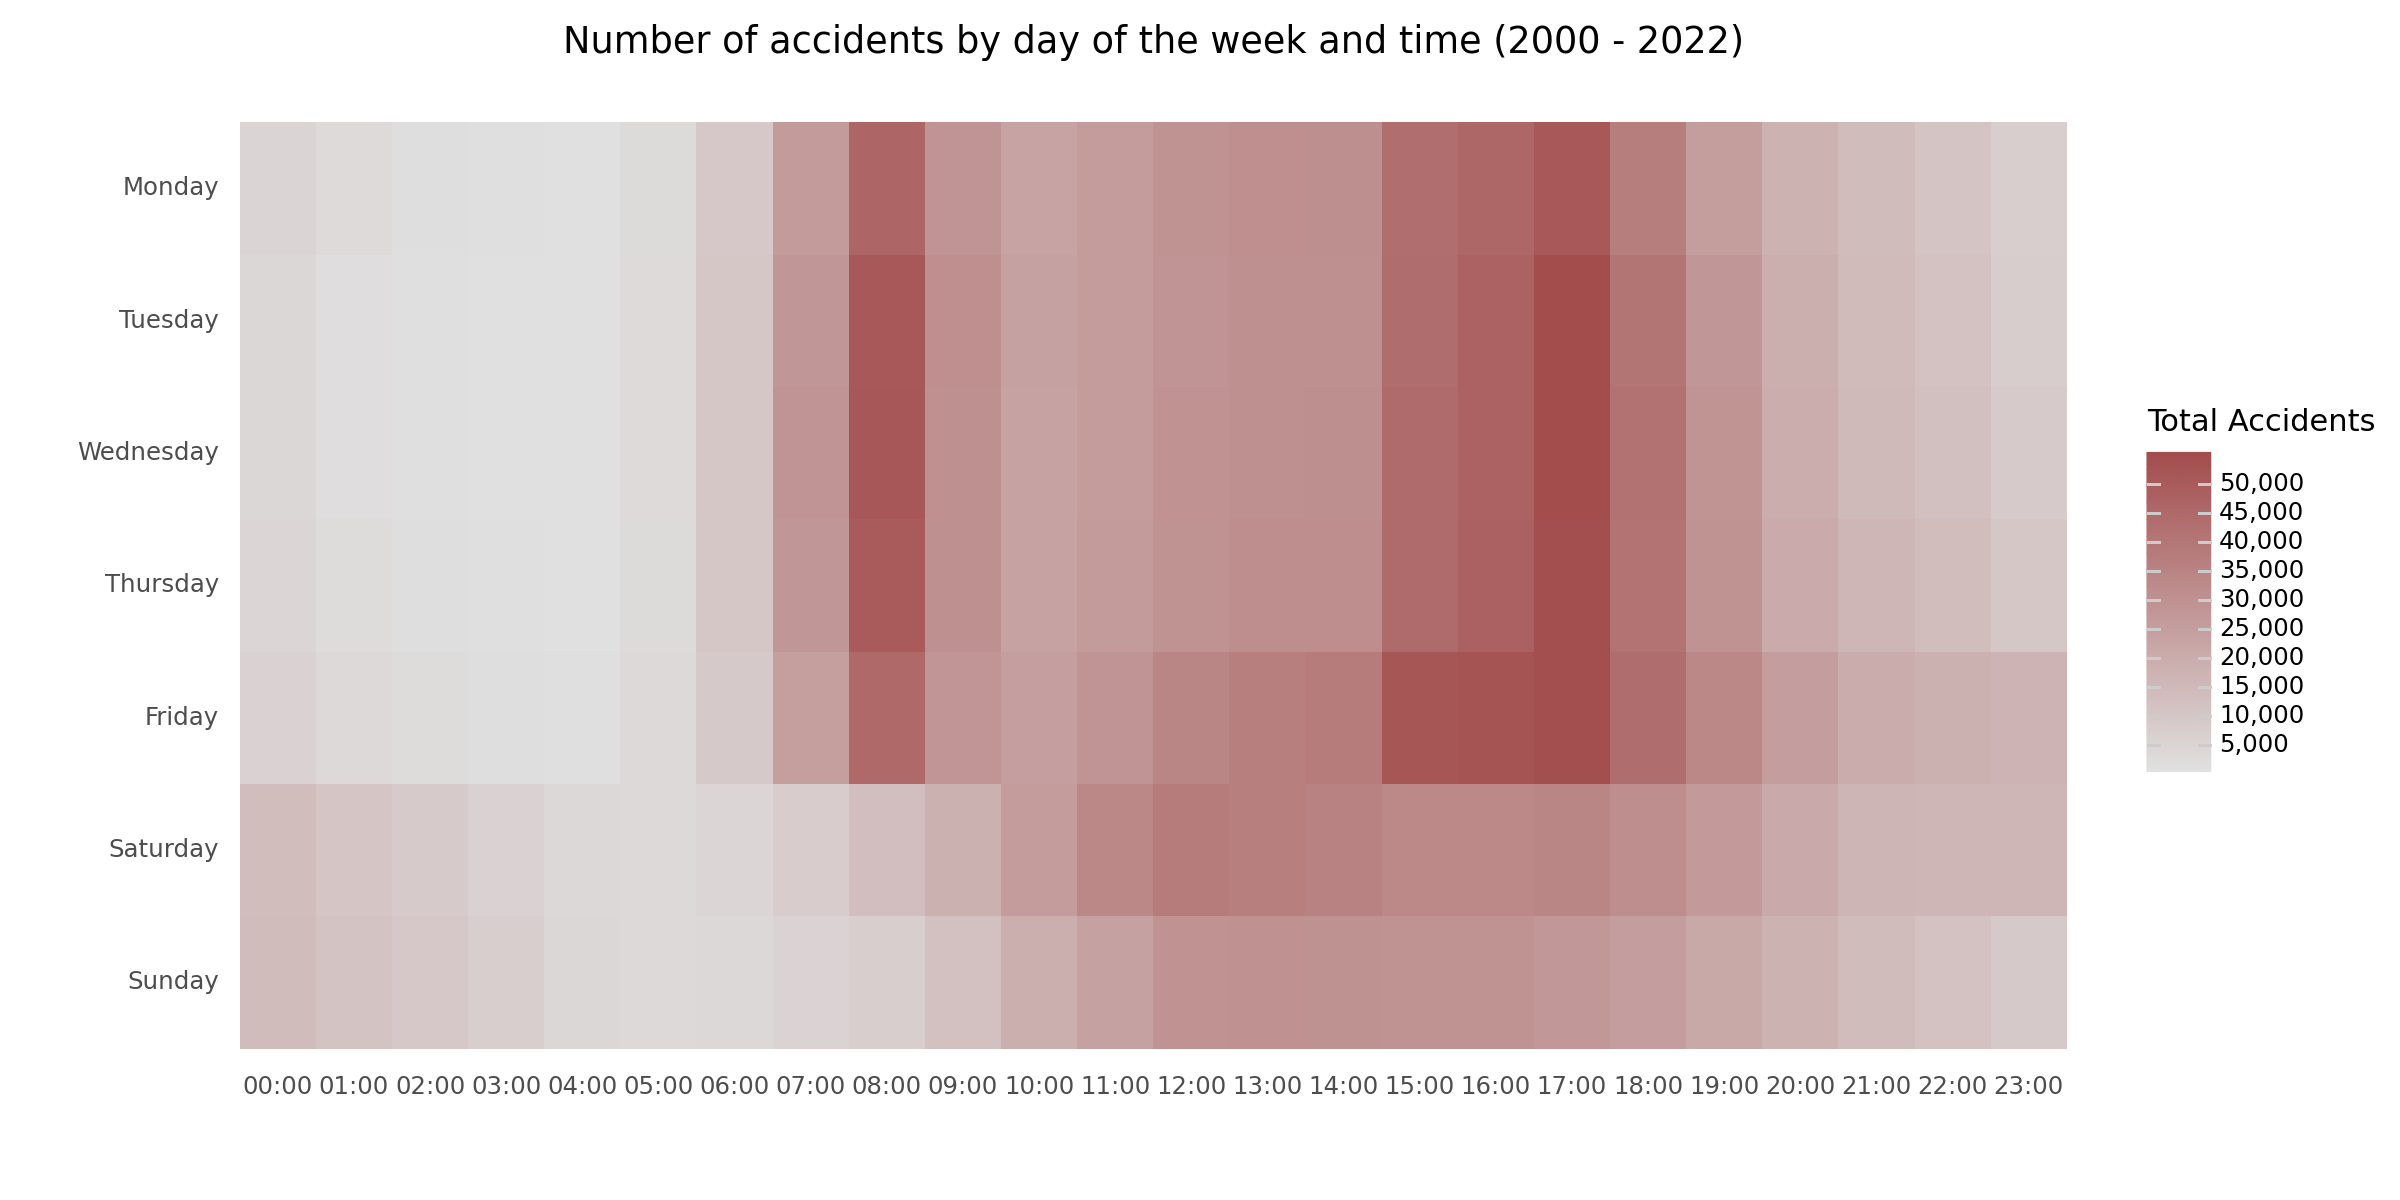

In [27]:
### Heatmap of total accidents by day of the week and hour
heat_total_acc_by_hour = df_collisions.groupby(['day_name', 'hour'])['accident_index'].size().reset_index(name='total_accidents')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][::-1]

heatmap_plot_2 = (
    ggplot(heat_total_acc_by_hour, aes(x='hour', y='day_name', fill='total_accidents')) + 
    geom_tile() +
    scale_fill_gradient(
        low="#e0e0e0", high="#a34d4d",
        breaks=range(0, heat_total_acc_by_hour['total_accidents'].max() + 1, 5000),
        labels=lambda x: ["{:,}".format(label) for label in x]
    ) +
    labs(title='Number of accidents by day of the week and time (2000 - 2022)',
         x='Hour', y='Day of the Week', fill='Total Accidents') + 
    theme_minimal() +
    theme(
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        legend_position='right',
        figure_size=(12, 6),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank()
    ) +
    scale_y_discrete(limits=days_order) 
)

print(heatmap_plot_2)